# 作業重點:

(1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

# 作業目標:
    
    取得各種優化器的運算結果

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from keras import optimizers


Using TensorFlow backend.


In [2]:
def build_model(opt):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [3]:
sgd = optimizers.SGD(lr = 0.01, momentum = 0.95, decay = 5e-5, nesterov = False)
rmsprop = optimizers.RMSprop(lr = 0.1, rho = 0.95)
adam = optimizers.adam(lr = 0.1, beta_1 = 0.95, beta_2 = 0.999)

opts = [sgd, rmsprop, adam]
_optimizers = ['SGD', 'RMSprop', 'Adam']

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
batch_size = [128,512]
epochs = [5,10]

In [5]:
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
for b in batch_size:
    for e in epochs:
        model = build_model(adam)
        print(f' Adam optimizer with batch size : {b}, epochs : {e}')
        history = model.fit(x_train, y_train, batch_size = b, epochs = e, validation_split = 0.2, verbose = 1, shuffle = True)
        loss, acc = model.evaluate(x_test,y_test, batch_size = 128, verbose = 1)
        print(f'-----validation loss : {loss},validation accuracy : {acc}--------')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
 Adam optimizer with batch size : 128, epochs : 5
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 111s 3ms/step - loss: 2.8782 - acc: 0.8204 - val_loss: 2.9008 - val_acc: 0.8190
Epoch 2/5
40000/40000 [==============================] - 113s 3ms/step - loss: 2.8826 - acc: 0.8202 - val_loss: 2.9008 - val_acc: 0.8190
Epoch 3/5
40000/40000 [==============================] - 116s 3ms/step - loss: 2.8834 - acc: 0.8201 - val_loss: 2.9008 - val_acc: 0.8190
Epoch 4/5
40000/40000 [==============================] - 110s 3ms/step - loss: 2.8816 - acc: 0.8202 - val_loss: 2.9008 - val_acc: 0.8190
Epoch 5/5
10000/10000 [==============================] - 10s 957us/step
-----validation loss : 2.8854426040649415,validation accuracy : 0.8199998023986816--------
 Adam optimizer with batch

 Current Optimizer : SGD


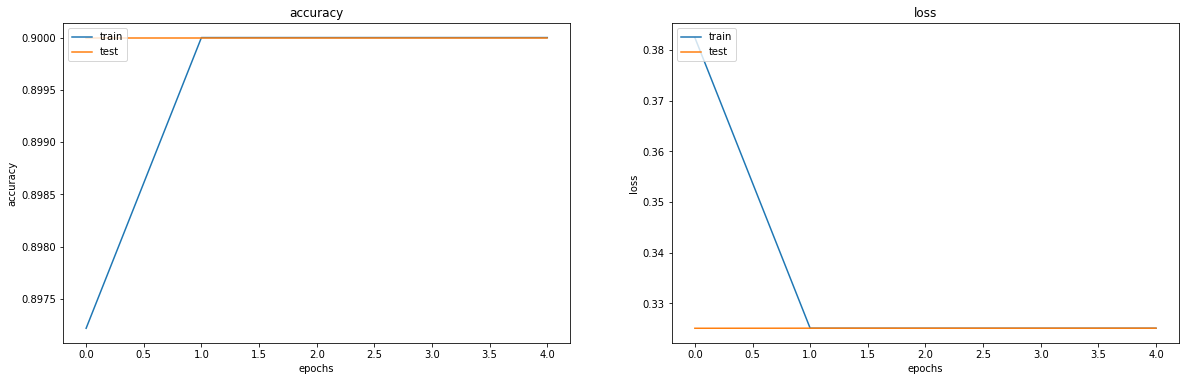

 Current Optimizer : RMSprop


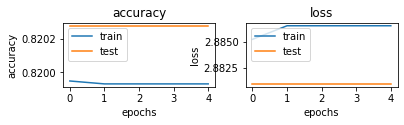

 Current Optimizer : Adam


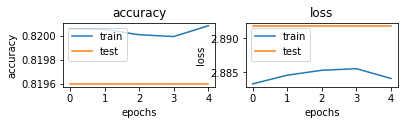

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,20))


plot_num = 1
for opt in opts:
    model = build_model(opt)
    print(f' Current Optimizer : {_optimizers[plot_num-1]}')
    history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_split = 0.2, verbose = 0, shuffle = True)
    plt.subplot(3,2,plot_num*2 -1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['train','test'], loc = 'upper left')
    
    plt.subplot(3,2,plot_num*2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper left')
    
    plt.show()
    plot_num += 1